In [1]:
from numpy.random import *
import numpy as np
import matplotlib.pyplot as plt
import sys,os
sys.path.append(os.pardir)
from tools.models.classifiers.adaptive_reglarizer_hinge_classifier import AdaptiveReglarizerHingeClassifier
from sklearn.model_selection import train_test_split

In [2]:
N=100
OUTLIERS=[0,3]

In [3]:
def generate(n,outliers):
    x_1_pos=randn(n//2)-15
    x_1_neg=randn(n//2)-5
    for i in outliers:
        x_1_pos[i]+=10
    x2= randn(n)
    y_pos=np.ones(n//2)
    y_neg=-np.ones(n//2)
    x1=np.concatenate([x_1_pos,x_1_neg])
    y=np.concatenate([y_pos,y_neg])
    X=np.concatenate([np.reshape(x1,(len(x1),1)),np.reshape(x2,(len(x2),1))],axis=1)
    p = np.random.permutation(len(X))
    X = X[p]
    y = y[p]
    return X,y

In [4]:
def plot_generated_data(X,y):
    x1=X[:,0]
    x2=X[:,1]
    fig = plt.figure()
    ax = fig.add_subplot(111)

    ax.scatter(x1[y==1],x2[y==1],color='blue',marker="o")
    ax.scatter(x1[y==-1],x2[y==-1],color='red',marker="x")


    plt.title("Generated Data")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()

In [5]:
def plot_boundary(X,y,mu):
    x1=X[:,0]
    x2=X[:,1]
    fig = plt.figure()
    ax = fig.add_subplot(111)

    ax.scatter(x1[y==1],x2[y==1],color='blue',marker="o")
    ax.scatter(x1[y==-1],x2[y==-1],color='red',marker="x")
    
    
    x = np.linspace(min(X[:,0]), max(X[:,0]),100)
    y = -(mu[1] * x + mu[0])/mu[2] 
    
    ax.plot(x, y, color='black')
    plt.title("Result")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()

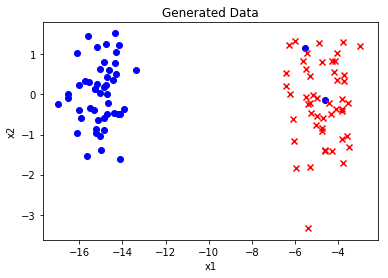

In [6]:
X,y=generate(N,OUTLIERS)
plot_generated_data(X,y)

In [62]:
model=AdaptiveReglarizerHingeClassifier(gamma=0.0001,seed=0)

In [63]:
model.fit(X,y,epochs=1000,batch_size=10)

epoch 100
epoch 200
epoch 300
epoch 400
epoch 500
epoch 600
epoch 700
epoch 800
epoch 900
epoch 1000


In [64]:
model.evaluate(X,y)

0.98

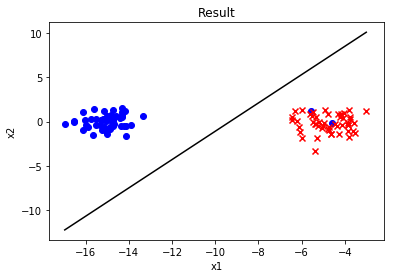

In [65]:
plot_boundary(X,y,model.coef_)